# **_PROJEKT ZALICZENIOWY_**

### Model przewidujący odejącia pracowników jako sposób na optymalizację kosztów 

Rotacja pracowników to zjawisko z którym musi zmierzyć się każdy pracodawca. Jest ona bardzo kosztowne dla firm. Szacuje się ze na polskim rynku pracy koszty zastąpienia zwolnionego pracownika oscylują pomiędzy 80 a 100% jego rocznego wynagrodzenia. Dlatego zrozumienie dlaczego i kiedy pracownicy odchodzą to jedno z kluczowych wyzwań HR

W ramach projektu wykorzystano dataset udostępniony przez firmę IBM (IBM HR Analytics Employee Attrition & Performance).  Zawiera on dane historyczne pracowników wraz informacja kto odszedł. Na jego podstawie stworzony zostanie model klasyfikacji przy wykorzystaniu uczenia nadzorowanego.

#### 1. Import bibliotek Pythona 

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sns.color_palette()
from IPython.display import display
pd.options.display.max_columns = None
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split  
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score
import re
import sys
import timeit
import string
from datetime import datetime
from time import time
from dateutil.parser import parse
import plotly
from plotly import plotly as py
import plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
import cufflinks as cf
cf.set_config_file(offline=True)
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import cufflinks
cufflinks.go_offline(connected=True)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler,Imputer,LabelEncoder,OneHotEncoder
from sklearn.pipeline import Pipeline

#### 2. Pobranie danych

In [2]:
data=pd.read_csv(r'HR-Employee-Attrition.csv')

#### Tworzenie kopii zapasowej danych

In [3]:
df = data.copy()

#### 3. Analiza danych

In [4]:
df.shape

(1470, 35)

Tabela zawiera 35 kolumn i 1470 wierszy

In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Dane zawierają informacje demograficzne o pracownikach takie jak wiek, staż, pleć, wyksztalcenie, odległości miejsca pracy od miejsca zamieszkania. Jednocześnie w posiadamy informacje o podróżach służbowych, miejscu w strukturze organizacyjnej, wynagrodzeniu, podwyżkach, nadgodzinach, wynikach pracy, szkoleniach, satysfakcji oraz work-life balnace.

In [6]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


Zestaw danych zawiera zarówno dane liczbowe jak i dane opisowe.

In [7]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
        'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
        'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
        'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
        'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
        'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
        'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
        'YearsSinceLastPromotion', 'YearsWithCurrManager'],
       dtype='object'),
 dtype('O'): Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
        'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
       dtype='object')}

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

Dane nie zawierają wartości brakujących (missingów)

In [9]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


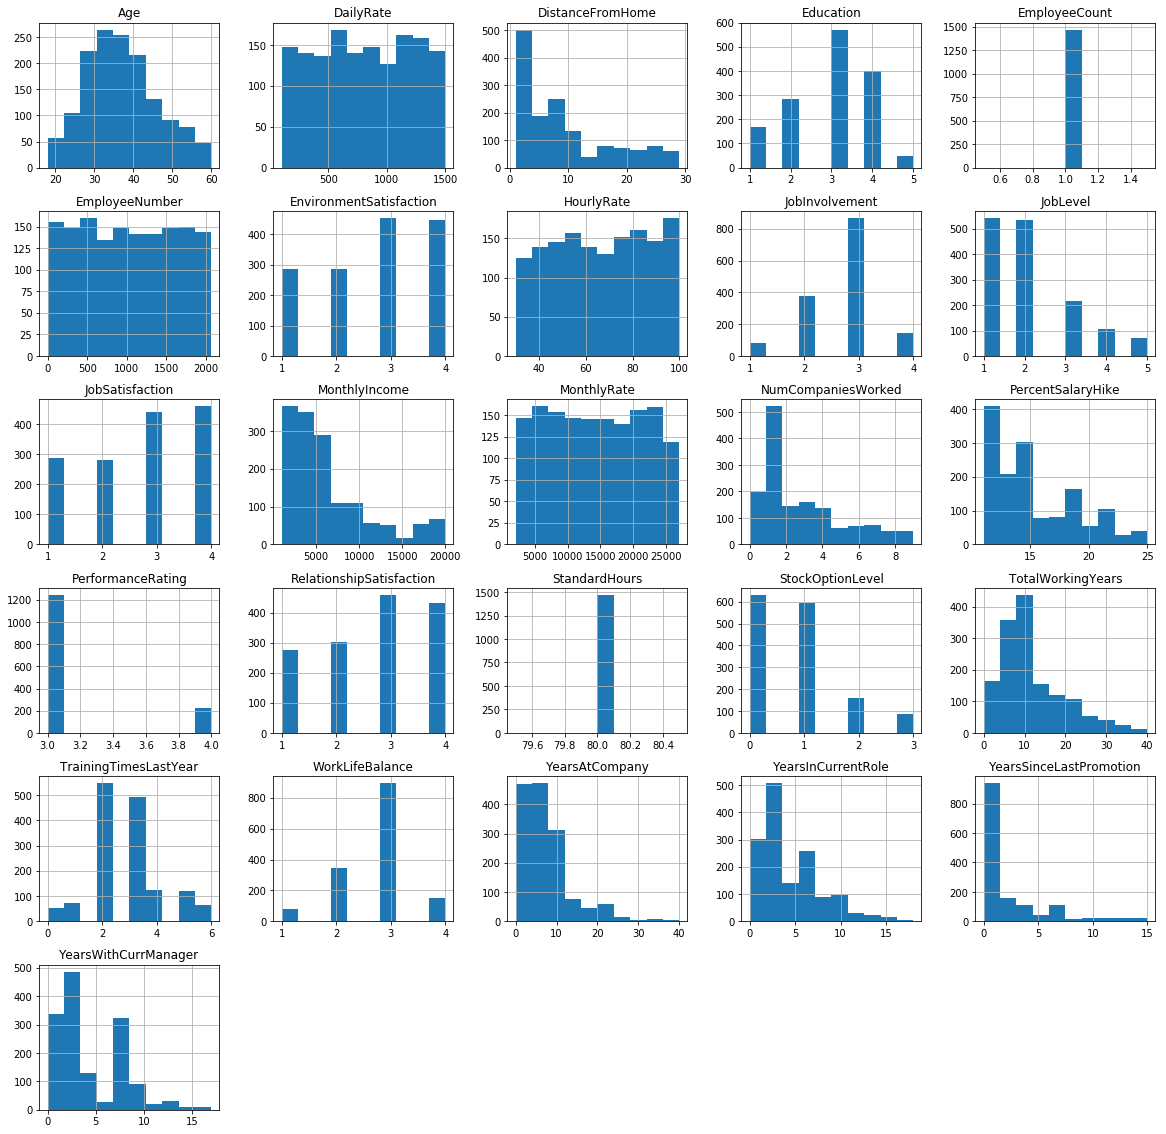

In [10]:
df.hist(figsize=(20,20))
plt.show()


Employee number jest unikalny dla każdego pracownika a StandardHours i EmployeeCount to wartości stale i nie przydadzą się do analizy

#### 3.1 Rozklady cech pracowników aktywnych i byłych

##### *- Wiek*

In [11]:
(mu, sigma) = norm.fit(df.loc[df['Attrition'] == 'Yes', 'Age'])
print(
    'Pracownicy odchodzący: średni wiek = {:.1f} lat oraz odchylenie standardowe = {:.1f}'.format(mu, sigma))
(mu, sigma) = norm.fit(df.loc[df['Attrition'] == 'No', 'Age'])
print('Aktywni pracownicy: średni wiek = {:.1f} lat oraz odchylenie standardowe = {:.1f}'.format(
    mu, sigma))

Pracownicy odchodzący: średni wiek = 33.6 lat oraz odchylenie standardowe = 9.7
Aktywni pracownicy: średni wiek = 37.6 lat oraz odchylenie standardowe = 8.9


Średni wiek pracowników odchodzących jest niższy niż pracowników aktywnych. Moze mieć to związek z wkaraczeniem generacji Y i Z na rynek pracy.


##### *Poniżej wykres gęstości przedstawiający rozkład zmiennej*

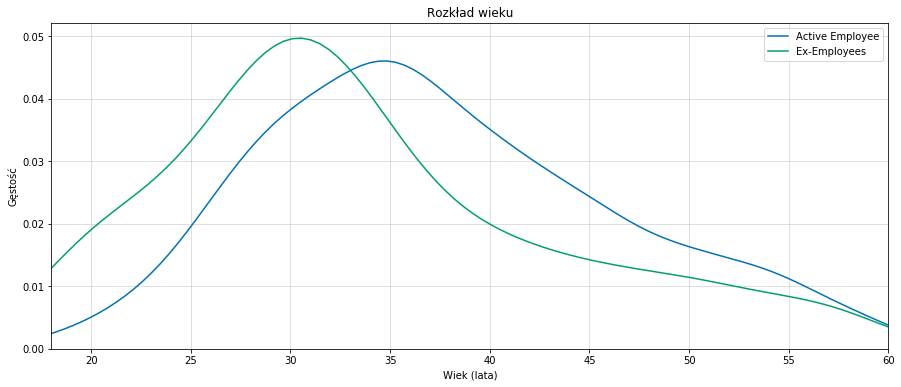

In [12]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df.loc[df['Attrition'] == 'No', 'Age'], label = 'Active Employee')
sns.kdeplot(df.loc[df['Attrition'] == 'Yes', 'Age'], label = 'Ex-Employees')
plt.xlim(left=18, right=60)
plt.xlabel('Wiek (lata)')
plt.ylabel('Gęstość')
plt.title('Rozkład wieku');

#### *- Wykształcenie*

In [13]:
df['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [14]:
df_EducationField = pd.DataFrame(columns=["Field", "% of Leavers"])
i=0
for field in list(df['EducationField'].unique()):
    ratio = df[(df['EducationField']==field)&(df['Attrition']=="Yes")].shape[0] / df[df['EducationField']==field].shape[0]
    df_EducationField.loc[i] = (field, ratio*100)
    i += 1
   
df_EF = df_EducationField.groupby(by="Field").sum()
df_EF.iplot(kind='bar',title='Pracownicy odchodzący według wykształcenia (%)')

#### *- Płeć*

In [15]:
df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [16]:
print("Rozkład płci: Mężczyźni = {:.1f}%; Kobiety {:.1f}%.".format((df[(df['Attrition'] == 'Yes') & (
    df['Gender'] == 'Male')].shape[0] / df[df['Gender'] == 'Male'].shape[0])*100, (df[(df['Attrition'] == 'Yes') & (df['Gender'] == 'Female')].shape[0] / df[df['Gender'] == 'Female'].shape[0])*100))

Rozkład płci: Mężczyźni = 17.0%; Kobiety 14.8%.


In [17]:
df_Gender = pd.DataFrame(columns=["Gender", "% of Leavers"])
i=0
for field in list(df['Gender'].unique()):
    ratio = df[(df['Gender']==field)&(df['Attrition']=="Yes")].shape[0] / df[df['Gender']==field].shape[0]
    df_Gender.loc[i] = (field, ratio*100)
    i += 1
   
df_G = df_Gender.groupby(by="Gender").sum()
df_G.iplot(kind='bar',title='Odchodzący według płci (%)')


##### *- Status rodzinny*

In [18]:
df['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [19]:
df_Marital = pd.DataFrame(columns=["Marital Status", "% of Leavers"])
i=0
for field in list(df['MaritalStatus'].unique()):
    ratio = df[(df['MaritalStatus']==field)&(df['Attrition']=="Yes")].shape[0] / df[df['MaritalStatus']==field].shape[0]
    df_Marital.loc[i] = (field, ratio*100)
    i += 1
  
df_MF = df_Marital.groupby(by="Marital Status").sum()
df_MF.iplot(kind='bar',title='Odchodzący według statusu rodzinnego (%)')

#### *- Odległość miejsca zamieszkania pracowników od pracy*

In [20]:
print("Odległość miejsca zamieszkania pracowników od pracy wynosi od {} do {} mil.".format(df['DistanceFromHome'].min(),
                                                                                       df['DistanceFromHome'].max()))

Odległość miejsca zamieszkania pracowników od pracy wynosi od 1 do 29 mil.


In [21]:
print('Średni dystans z domu do pracy aktywnych pracowników: {:.2f} mil natomiast pracowników odchodzących: {:.2f} mil'.format(
    df[df['Attrition'] == 'No']['DistanceFromHome'].mean(), df[df['Attrition'] == 'Yes']['DistanceFromHome'].mean()))


Średni dystans z domu do pracy aktywnych pracowników: 8.92 mil natomiast pracowników odchodzących: 10.63 mil


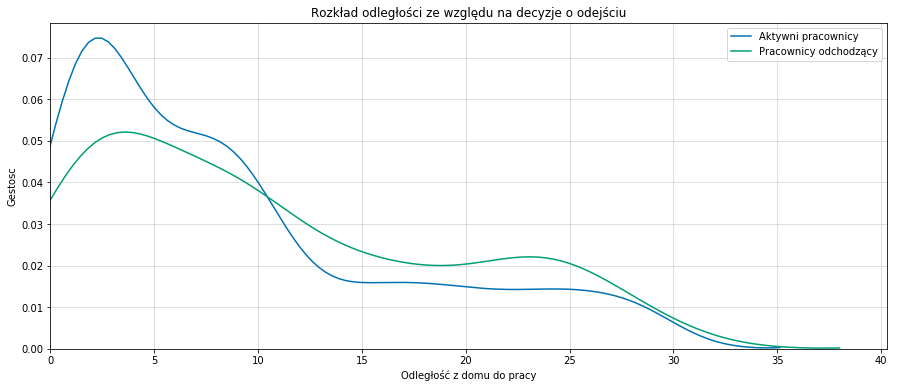

In [22]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df.loc[df['Attrition'] == 'No', 'DistanceFromHome'], label = 'Aktywni pracownicy')
sns.kdeplot(df.loc[df['Attrition'] == 'Yes', 'DistanceFromHome'], label = 'Pracownicy odchodzący')
plt.xlabel('Odległość z domu do pracy')
plt.xlim(left=0)
plt.ylabel('Gestosc')
plt.title('Rozkład odległości ze względu na decyzje o odejściu');


#### *- Miejsce w strukturze organizacyjnej*

In [23]:
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [24]:
df_Department = pd.DataFrame(columns=["Department", "% of Leavers"])
i=0
for field in list(df['Department'].unique()):
    ratio = df[(df['Department']==field)&(df['Attrition']=="Yes")].shape[0] / df[df['Department']==field].shape[0]
    df_Department.loc[i] = (field, ratio*100)
    i += 1
    
df_DF = df_Department.groupby(by="Department").sum()
df_DF.iplot(kind='bar',title='Odchodzący w poszczególych departamentach (%)')

#### *- Czestotliwość podróży służbowych*

In [25]:
df['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [26]:
df_BusinessTravel = pd.DataFrame(columns=["Business Travel", "% of Leavers"])
i=0
for field in list(df['BusinessTravel'].unique()):
    ratio = df[(df['BusinessTravel']==field)&(df['Attrition']=="Yes")].shape[0] / df[df['BusinessTravel']==field].shape[0]
    df_BusinessTravel.loc[i] = (field, ratio*100)
    i += 1
     
df_BT = df_BusinessTravel.groupby(by="Business Travel").sum()
df_BT.iplot(kind='bar',title='Ochodzący według czestotliwości podróży służbowych (%)')


#### *- Stanowiska*

In [27]:
df['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [28]:
df_JobRole = pd.DataFrame(columns=["Job Role", "% of Leavers"])
i=0
for field in list(df['JobRole'].unique()):
    ratio = df[(df['JobRole']==field)&(df['Attrition']=="Yes")].shape[0] / df[df['JobRole']==field].shape[0]
    df_JobRole.loc[i] = (field, ratio*100)
    i += 1
   
df_JR = df_JobRole.groupby(by="Job Role").sum()
df_JR.iplot(kind='bar',title='Odchodzący według stanowiska (%)')

#### *- Kategoria zaszeregowania*

In [29]:
df['JobLevel'].value_counts()

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

In [30]:
df_JobLevel = pd.DataFrame(columns=["Job Level", "% of Leavers"])
i=0
for field in list(df['JobLevel'].unique()):
    ratio = df[(df['JobLevel']==field)&(df['Attrition']=="Yes")].shape[0] / df[df['JobLevel']==field].shape[0]
    df_JobLevel.loc[i] = (field, ratio*100)
    i += 1
    
df_JL = df_JobLevel.groupby(by="Job Level").sum()
df_JL.iplot(kind='bar',title='Odchodzący według kategorii zaszeregowania (%)')

#### *- Zaangażowanie pracowników*

In [31]:
df['JobInvolvement'].value_counts()

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

In [32]:
df_JobInvolvement = pd.DataFrame(columns=["Job Involvement", "% of Leavers"])
i=0
for field in list(df['JobInvolvement'].unique()):
    ratio = df[(df['JobInvolvement']==field)&(df['Attrition']=="Yes")].shape[0] / df[df['JobInvolvement']==field].shape[0]
    df_JobInvolvement.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_JI = df_JobInvolvement.groupby(by="Job Involvement").sum()
df_JI.iplot(kind='bar',title='Odchodzący według zaanagażowania pracowników (%)')

#### *- Szkolenia*

In [33]:
print("Liczba szkoleń w ostatnim roku waha sie pomiędzy {} a {}".format(
    df['TrainingTimesLastYear'].min(), df['TrainingTimesLastYear'].max()))

Liczba szkoleń w ostatnim roku waha sie pomiędzy 0 a 6


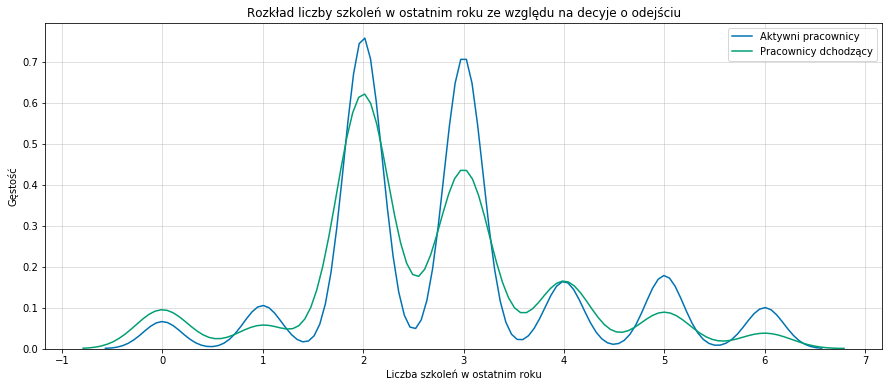

In [34]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df.loc[df['Attrition'] == 'No', 'TrainingTimesLastYear'], label = 'Aktywni pracownicy')
sns.kdeplot(df.loc[df['Attrition'] == 'Yes', 'TrainingTimesLastYear'], label = 'Pracownicy dchodzący')
plt.xlabel('Liczba szkoleń w ostatnim roku')
plt.ylabel('Gęstość')
plt.title('Rozkład liczby szkoleń w ostatnim roku ze względu na decyje o odejściu');

#### - Doświadczenie u innych pracodawców

In [35]:
df['NumCompaniesWorked'].value_counts()

1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64

In [36]:
df_NumCompaniesWorked = pd.DataFrame(columns=["Num Companies Worked", "% of Leavers"])
i=0
for field in list(df['NumCompaniesWorked'].unique()):
    ratio = df[(df['NumCompaniesWorked']==field)&(df['Attrition']=="Yes")].shape[0] / df[df['NumCompaniesWorked']==field].shape[0]
    df_NumCompaniesWorked.loc[i] = (field, ratio*100)
    i += 1
   
df_NC = df_NumCompaniesWorked.groupby(by="Num Companies Worked").sum()
df_NC.iplot(kind='bar',title='Odchodzący według liczby poprzednich pracodawców (%)')

#### *- Staż*

In [37]:
print("Staż w firmie waha sie pomiędzy {} a {} lat.".format(
    df['YearsAtCompany'].min(), df['YearsAtCompany'].max()))

Staż w firmie waha sie pomiędzy 0 a 40 lat.


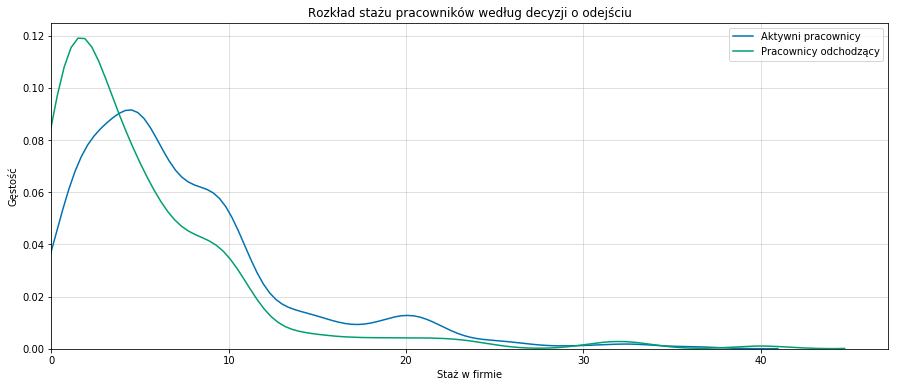

In [38]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df.loc[df['Attrition'] == 'No', 'YearsAtCompany'], label = 'Aktywni pracownicy')
sns.kdeplot(df.loc[df['Attrition'] == 'Yes', 'YearsAtCompany'], label = 'Pracownicy odchodzący')
plt.xlabel('Staż w firmie')
plt.xlim(left=0)
plt.ylabel('Gęstość')
plt.title('Rozkład stażu pracowników według decyzji o odejściu');

In [39]:
print("Liczba lat w obecnej roli waha się pomiedzy {} a {} lat.".format(
    df['YearsInCurrentRole'].min(), df['YearsInCurrentRole'].max()))

Liczba lat w obecnej roli waha się pomiedzy 0 a 18 lat.


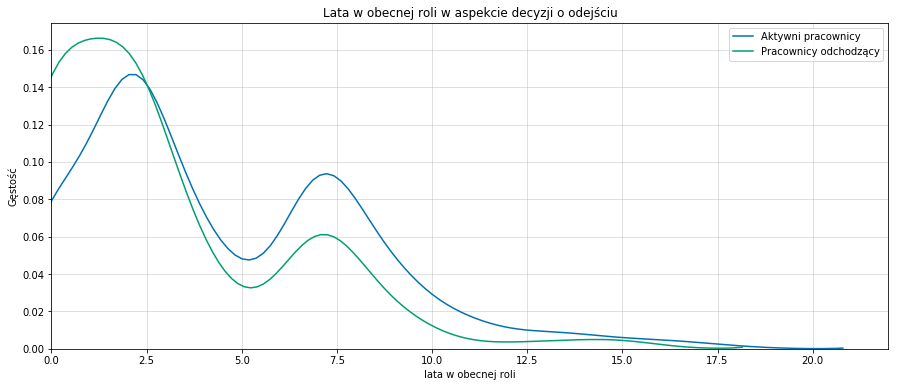

In [40]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df.loc[df['Attrition'] == 'No', 'YearsInCurrentRole'], label = 'Aktywni pracownicy')
sns.kdeplot(df.loc[df['Attrition'] == 'Yes', 'YearsInCurrentRole'], label = 'Pracownicy odchodzący')
plt.xlabel('lata w obecnej roli')
plt.xlim(left=0)
plt.ylabel('Gęstość')
plt.title('Lata w obecnej roli w aspekcie decyzji o odejściu');

#### *- Liczba lat od ostatniego awansu*

In [41]:
print("Liczba lat od ostatniego awansu waha sie pomiędzy {} a {} lat.".format(
    df['YearsSinceLastPromotion'].min(), df['YearsSinceLastPromotion'].max()))

Liczba lat od ostatniego awansu waha sie pomiędzy 0 a 15 lat.


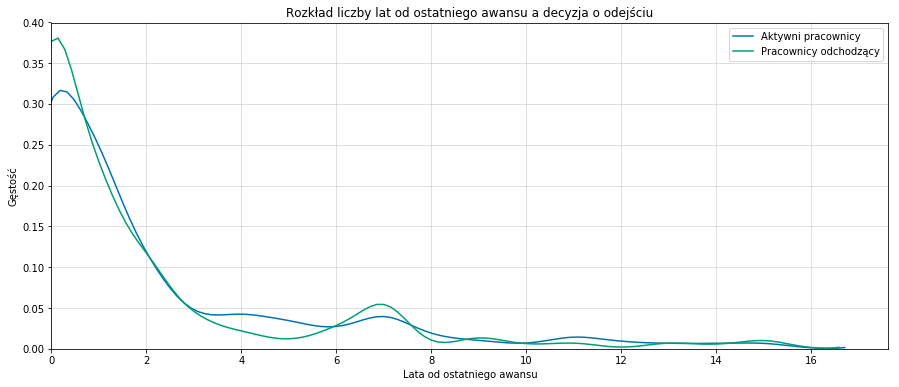

In [42]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df.loc[df['Attrition'] == 'No', 'YearsSinceLastPromotion'], label = 'Aktywni pracownicy')
sns.kdeplot(df.loc[df['Attrition'] == 'Yes', 'YearsSinceLastPromotion'], label = 'Pracownicy odchodzący')
plt.xlabel('Lata od ostatniego awansu')
plt.xlim(left=0)
plt.ylabel('Gęstość')
plt.title('Rozkład liczby lat od ostatniego awansu a decyzja o odejściu');

#### *- Staż pracy ogółem*

In [43]:
print("Całkowity staż pracy waha sie pomiędzy {} a {} lat.".format(
    df['TotalWorkingYears'].min(), df['TotalWorkingYears'].max()))

Całkowity staż pracy waha sie pomiędzy 0 a 40 lat.


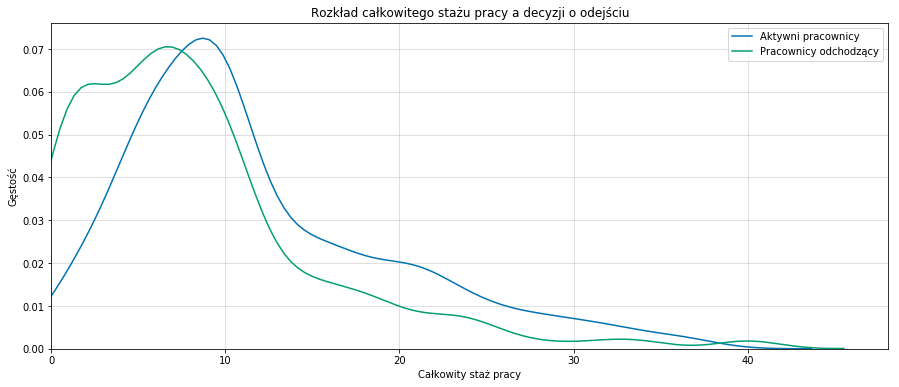

In [44]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df.loc[df['Attrition'] == 'No', 'TotalWorkingYears'], label = 'Aktywni pracownicy')
sns.kdeplot(df.loc[df['Attrition'] == 'Yes', 'TotalWorkingYears'], label = 'Pracownicy odchodzący')
plt.xlabel('Całkowity staż pracy')
plt.xlim(left=0)
plt.ylabel('Gęstość')
plt.title('Rozkład całkowitego stażu pracy a decyzji o odejściu');

#### *- Liczba lat współpracy z obecnym menedżerem*

In [45]:
print("Liczba lat współpracy z obecnym menedżerem waha sie pomiędzy  {} a {} lat.".format(
    df['YearsWithCurrManager'].min(), df['YearsWithCurrManager'].max()))

Liczba lat współpracy z obecnym menedżerem waha sie pomiędzy  0 a 17 lat.


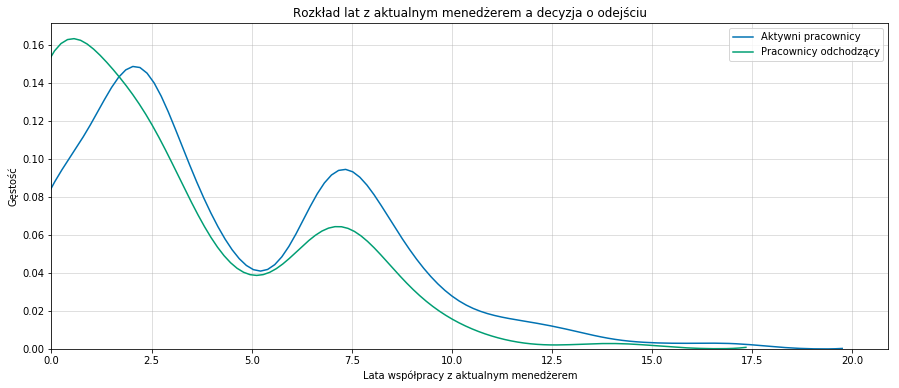

In [46]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df.loc[df['Attrition'] == 'No', 'YearsWithCurrManager'], label = 'Aktywni pracownicy')
sns.kdeplot(df.loc[df['Attrition'] == 'Yes', 'YearsWithCurrManager'], label = 'Pracownicy odchodzący')
plt.xlabel('Lata współpracy z aktualnym menedżerem')
plt.xlim(left=0)
plt.ylabel('Gęstość')
plt.title('Rozkład lat z aktualnym menedżerem a decyzja o odejściu');

#### *WorkLife Balance*

In [47]:
df['WorkLifeBalance'].value_counts()

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

In [48]:
df_WorkLifeBalance = pd.DataFrame(columns=["WorkLifeBalance", "% of Leavers"])
i=0
for field in list(df['WorkLifeBalance'].unique()):
    ratio = df[(df['WorkLifeBalance']==field)&(df['Attrition']=="Yes")].shape[0] / df[df['WorkLifeBalance']==field].shape[0]
    df_WorkLifeBalance.loc[i] = (field, ratio*100)
    i += 1
     
df_WLB = df_WorkLifeBalance.groupby(by="WorkLifeBalance").sum()
df_WLB.iplot(kind='bar',title='Odchodzący a WorkLife Balance (%)')

#### *- Nadgodziny*

In [49]:
df['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

In [50]:
df_OverTime = pd.DataFrame(columns=["OverTime", "% of Leavers"])
i=0
for field in list(df['OverTime'].unique()):
    ratio = df[(df['OverTime']==field)&(df['Attrition']=="Yes")].shape[0] / df[df['OverTime']==field].shape[0]
    df_OverTime.loc[i] = (field, ratio*100)
    i += 1
   
df_OT = df_OverTime.groupby(by="OverTime").sum()
df_OT.iplot(kind='bar',title='Odchodzący według czasu pracy w nadgodzinach (%)')

#### *Wynagrodzenia*

In [51]:
print("Stawka godzinowa waha się pomiędzy ${} a ${}.".format(
    df['HourlyRate'].min(), df['HourlyRate'].max()))

Stawka godzinowa waha się pomiędzy $30 a $100.


In [52]:
print("Stawka dzienna waha się pomiędzy ${} a ${}.".format(
    df['DailyRate'].min(), df['DailyRate'].max()))

Stawka dzienna waha się pomiędzy $102 a $1499.


In [53]:
print("Stawka miesięczna waha się pomiędzy  ${} a ${}.".format(
    df['MonthlyRate'].min(), df['MonthlyRate'].max()))

Stawka miesięczna waha się pomiędzy  $2094 a $26999.


In [54]:
print("Miesięczny dochód na rękę waha się pomiędzy ${} a ${}.".format(
    df['MonthlyIncome'].min(), df['MonthlyIncome'].max()))

Miesięczny dochód na rękę waha się pomiędzy $1009 a $19999.


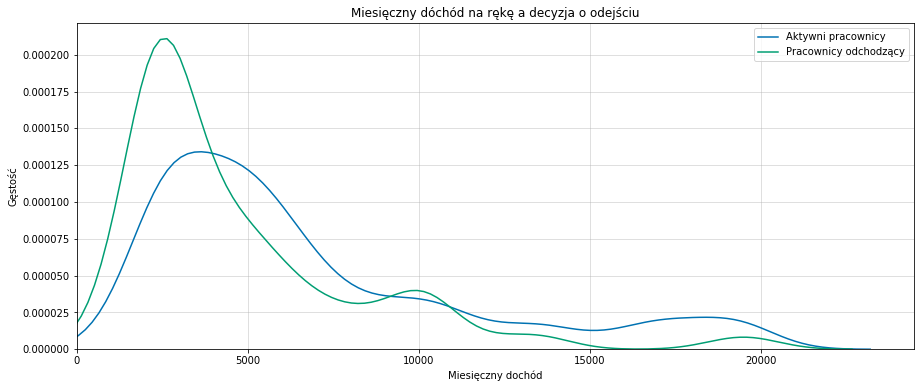

In [55]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df.loc[df['Attrition'] == 'No', 'MonthlyIncome'], label = 'Aktywni pracownicy')
sns.kdeplot(df.loc[df['Attrition'] == 'Yes', 'MonthlyIncome'], label = 'Pracownicy odchodzący')
plt.xlabel('Miesięczny dochód')
plt.xlim(left=0)
plt.ylabel('Gęstość')
plt.title('Miesięczny dóchód na rękę a decyzja o odejściu');

In [56]:
print("Procent podwyżek waha się pomiędzy {}% a {}%.".format(
    df['PercentSalaryHike'].min(), df['PercentSalaryHike'].max()))

Procent podwyżek waha się pomiędzy 11% a 25%.


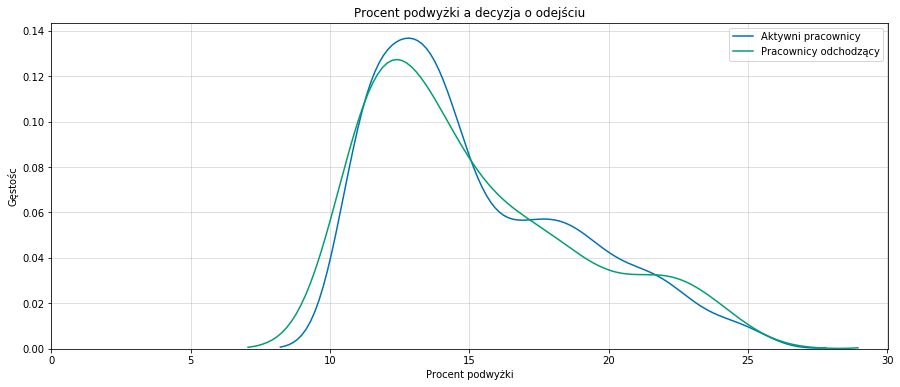

In [57]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df.loc[df['Attrition'] == 'No', 'PercentSalaryHike'], label = 'Aktywni pracownicy')
sns.kdeplot(df.loc[df['Attrition'] == 'Yes', 'PercentSalaryHike'], label = 'Pracownicy odchodzący')
plt.xlabel('Procent podwyżki')
plt.xlim(left=0)
plt.ylabel('Gęstośc')
plt.title('Procent podwyżki a decyzja o odejściu');

#### *- Satysfakcja z pracy*

In [58]:
df['EnvironmentSatisfaction'].value_counts()

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

In [59]:
df_JobSatisfaction = pd.DataFrame(columns=["JobSatisfaction", "% of Leavers"])
i=0
for field in list(df['JobSatisfaction'].unique()):
    ratio = df[(df['JobSatisfaction']==field)&(df['Attrition']=="Yes")].shape[0] / df[df['JobSatisfaction']==field].shape[0]
    df_JobSatisfaction.loc[i] = (field, ratio*100)
    i += 1
   
df_JS = df_JobSatisfaction.groupby(by="JobSatisfaction").sum()
df_JS.iplot(kind='bar',title='Odchodzący a satysfakcja z pracy (%)')


In [60]:
df['RelationshipSatisfaction'].value_counts()

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64

In [61]:
df_RelationshipSatisfaction = pd.DataFrame(columns=["RelationshipSatisfaction", "% of Leavers"])
i=0
for field in list(df['RelationshipSatisfaction'].unique()):
    ratio = df[(df['RelationshipSatisfaction']==field)&(df['Attrition']=="Yes")].shape[0] / df[df['RelationshipSatisfaction']==field].shape[0]
    df_RelationshipSatisfaction.loc[i] = (field, ratio*100)
    i += 1
  
df_RS = df_RelationshipSatisfaction.groupby(by="RelationshipSatisfaction").sum()
df_RS.iplot(kind='bar',title='Odchodzący według satysfakcji z relacji (%)')

#### - Wyniki pracy 
1 'Niskie' 
2 'Dobre' 
3 'Znakomite' 
4 'Wybitne'

In [62]:
df['PerformanceRating'].value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

In [63]:
print("Procent odchodzących a wyniki pracy: 3: {:.2f}%, 4: {:.2f}%".format(
    df[(df['Attrition'] == 'Yes') & (df['PerformanceRating'] == 3)
          ].shape[0] / df[df['PerformanceRating'] == 3].shape[0]*100,
    df[(df['Attrition'] == 'Yes') & (df['PerformanceRating'] == 4)].shape[0] / df[df['PerformanceRating'] == 4].shape[0]*100))

Procent odchodzących a wyniki pracy: 3: 16.08%, 4: 16.37%


In [64]:
df_PerformanceRating = pd.DataFrame(columns=["PerformanceRating", "% of Leavers"])
i=0
for field in list(df['PerformanceRating'].unique()):
    ratio = df[(df['PerformanceRating']==field)&(df['Attrition']=="Yes")].shape[0] / df[df['PerformanceRating']==field].shape[0]
    df_PerformanceRating.loc[i] = (field, ratio*100)
    i += 1
    
df_PR = df_PerformanceRating.groupby(by="PerformanceRating").sum()
df_PR.iplot(kind='bar',title='Odchodzący a wyniki pracy (%)')

#### *- Decyzja o odejściu - wartosśc którą chcemy przewidywać*

In [65]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [66]:
print("Procent pracowników aktywnych {:.1f}% procent praocników odchodzących: {:.1f}%".format(
    df[df['Attrition'] == 'No'].shape[0] / df.shape[0]*100,
    df[df['Attrition'] == 'Yes'].shape[0] / df.shape[0]*100))

Procent pracowników aktywnych 83.9% procent praocników odchodzących: 16.1%


In [67]:
df['Attrition'].iplot(kind='hist', xTitle='Attrition',
                         yTitle='count', title='Rozkład rotacji pracowników')

Jak widac na powyzszym wykresie mamy do czynienia z niezbalansowana grupa.


#### 3.2 Korelacja pomiedzy zmiennymi

In [68]:
df_trans = df.copy()
df_trans['Target'] = df_trans['Attrition'].apply(
    lambda x: 0 if x == 'No' else 1)
df_trans = df_trans.drop(
    ['Attrition', 'EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1)
correlations = df_trans.corr()['Target'].sort_values()
print('Cechy z największą korealcją dodatnią: \n', correlations.tail(5))
print('\nCechy  najwiekszą korelacją ujemną: \n', correlations.head(5))



Cechy z największą korealcją dodatnią: 
 PerformanceRating     0.002889
MonthlyRate           0.015170
NumCompaniesWorked    0.043494
DistanceFromHome      0.077924
Target                1.000000
Name: Target, dtype: float64

Cechy  najwiekszą korelacją ujemną: 
 TotalWorkingYears    -0.171063
JobLevel             -0.169105
YearsInCurrentRole   -0.160545
MonthlyIncome        -0.159840
Age                  -0.159205
Name: Target, dtype: float64


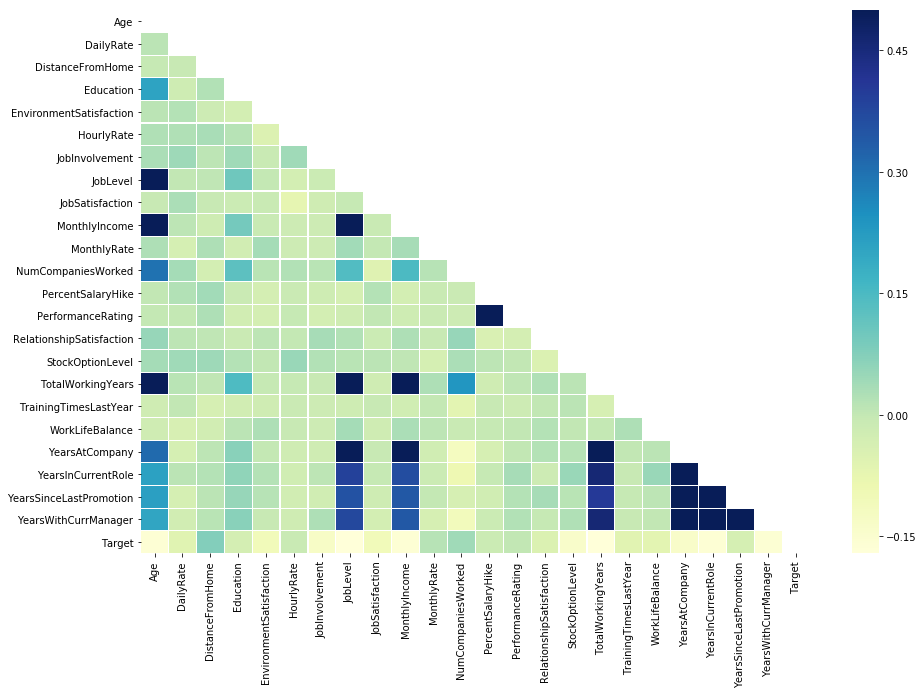

In [69]:
corr = df_trans.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
            
            linewidths=.2, cmap="YlGnBu");

W zestawie danych nie ma żadnych brakujących lub błędnych wartości danych.
Najsilniejsze pozytywne korelacje z cechami docelowymi to: Performance Rating, Monthly Rate, Num Companies Worked, Distance From Home.
Najsilniejsze ujemne korelacje z cechami docelowymi to: Total Working Years, Job Level, Years In Current Role, and Monthly Income.
Zestaw danych jest niezrównoważony z większością obserwacji opisujących aktywnych pracowników.
Niektóre dane są zbędne w naszej analizie i mogą zaszumić wynik, a mianowicie: EmployeeCount, EmployeeNumber, StandardHours i Over18.


#### 4. Preprocessing - przygotowanie danych

#### *Zmiana etykiet jakościowych na liczbowe*

In [70]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()

In [71]:
print(df.shape)
df.head()

(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [72]:
le_count = 0
for col in df.columns[1:]:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) <= 2:
            le.fit(df[col])
            df[col] = le.transform(df[col])
            le_count += 1
print('{} kolumn zostało zakodowanych.'.format(le_count))

4 kolumn zostało zakodowanych.


In [73]:
df_HR = pd.get_dummies(df, drop_first=True)

In [74]:
print(df_HR.shape)
df_HR.head()

(1470, 49)


,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,1,2,0,94,3,2,4,5993,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,49,0,279,8,1,1,2,3,1,61,2,2,2,5130,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,37,1,1373,2,2,1,4,4,1,92,2,1,3,2090,2396,6,0,1,15,3,2,80,0,7,3,3,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,1,5,4,0,56,3,1,3,2909,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,27,0,591,2,1,1,7,1,1,40,3,1,2,3468,16632,9,0,0,12,3,4,80,1,6,3,3,2,2,2,2,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0


#### *Skalowanie cech*
Algorytmy uczenia maszynowego działają lepiej, gdy wejściowe zmienne numeryczne mieszczą się w podobnej skali.

In [75]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 5))
HR_col = list(df_HR.columns)
HR_col.remove('Attrition')
for col in HR_col:
    df_HR[col] = df_HR[col].astype(float)
    df_HR[[col]] = scaler.fit_transform(df_HR[[col]])
df_HR['Attrition'] = pd.to_numeric(df_HR['Attrition'], downcast='float')
df_HR.head()


,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,2.738095,1.0,3.579098,0.000000,1.25,0.0,0.000000,1.666667,0.0,4.571429,3.333333,1.25,5.000000,1.312270,3.490263,4.444444,0.0,5.0,0.000000,0.0,0.000000,0.0,0.000000,1.000,0.0,0.000000,0.75,1.111111,0.000000,1.470588,0.0,5.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0
1,3.690476,0.0,0.633500,1.250000,0.00,0.0,0.002419,3.333333,5.0,2.214286,1.666667,1.25,1.666667,1.085045,4.580004,0.555556,0.0,0.0,4.285714,5.0,5.000000,0.0,1.666667,1.250,2.5,3.333333,1.25,1.944444,0.333333,2.058824,5.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0
2,2.261905,1.0,4.549034,0.178571,1.25,0.0,0.007257,5.000000,5.0,4.428571,1.666667,0.00,3.333333,0.284623,0.060630,3.333333,0.0,5.0,1.428571,0.0,1.666667,0.0,0.000000,0.875,2.5,3.333333,0.00,0.000000,0.000000,0.000000,0.0,5.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,1.785714,0.0,4.617037,0.357143,3.75,0.0,0.009676,5.000000,0.0,1.857143,3.333333,0.00,3.333333,0.500263,4.229070,0.555556,0.0,5.0,0.000000,0.0,3.333333,0.0,0.000000,1.000,2.5,3.333333,1.00,1.944444,1.000000,0.000000,5.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0
4,1.071429,0.0,1.750179,0.178571,0.00,0.0,0.014514,0.000000,5.0,0.714286,3.333333,0.00,1.666667,0.647446,2.918691,5.000000,0.0,0.0,0.357143,0.0,5.000000,0.0,1.666667,0.750,2.5,3.333333,0.25,0.555556,0.666667,0.588235,0.0,5.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0


In [76]:
print('Nowy rozmiar danych: {}'. format(df_HR.shape))

Nowy rozmiar danych: (1470, 49)


#### *Podział na cześć treningową i testową*

In [77]:
target = df_HR['Attrition'].copy()

In [78]:
df_HR.drop(['Attrition', 'EmployeeCount', 'EmployeeNumber',
            'StandardHours', 'Over18'], axis=1, inplace=True)
print('Nowy rozmiar danych wynosi: {}'.format(df_HR.shape))

Nowy rozmiar danych wynosi: (1470, 44)


In [79]:
X_train, X_test, y_train, y_test = train_test_split(df_HR,
                                                    target,
                                                    test_size=0.25,
                                                    random_state=7,
                                                    stratify=target)  #ponieważ mamy nierównowagę klas stosujemy parametr umożliwiających zachowanie ich proporcji pomiędzy częscią treningowa a testową 

#Wprawdzie parametr stratify nie zbalasuje nam danych jednak jeśli wynik korswalidacji bedzie nizadawalący 
#możemy je zbalansować stosujac SMOTE oversampling,który dopełni dysproporcję
 
print("Liczba wierszy X_train: ", X_train.shape)
print("Liczba wierszy y_train: ", y_train.shape)
print("Liczba wierszy X_test: ", X_test.shape)
print("Liczba wierszy y_test: ", y_test.shape)

Liczba wierszy X_train:  (1102, 44)
Liczba wierszy y_train:  (1102,)
Liczba wierszy X_test:  (368, 44)
Liczba wierszy y_test:  (368,)


#### Do analizy wykorzystamy 5 modeli: 
Logistic Regression, Random Forest, SVM, KNN, Decision Tree Classifier, Gaussian NB

In [80]:
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=7,
                                                         class_weight='balanced')))
models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, random_state=7)))
models.append(('SVM', SVC(gamma='auto', random_state=7)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(random_state=7)))
models.append(('Gaussian NB', GaussianNB()))


In [81]:
acc_results = []
auc_results = []
names = []

# do oceny modeli zastsujemy kroswalidację. Ponieważ mamy do czynienia z niezbalasowanymi danymi mierzenie dokładności
# będzie niewystarczające. Dlatego zastosujemy analize krzywej ROC. W przypadku niezbalansowanychdanych można zastosować
# StartifiedKFold, który zapewnia taki sam udział próbek z klas wynikowych
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']
df_results = pd.DataFrame(columns=col)
i = 0

for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=7)  

    cv_acc_results = model_selection.cross_val_score(  # dokładność
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc
        model, X_train, y_train, cv=kfold, scoring='roc_auc')
    

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
df_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Logistic Regression,82.03,8.06,74.49,5.53
2,SVM,78.88,8.21,84.48,4.18
1,Random Forest,78.86,7.01,85.30,3.75
5,Gaussian NB,75.06,5.10,68.14,3.14
3,KNN,66.42,9.90,84.21,4.04
4,Decision Tree Classifier,58.02,6.23,76.22,4.23


Już na pierwzy rzut oka widać że wysoka dokłdność nie przedkałda się na wynik ROC_AUC

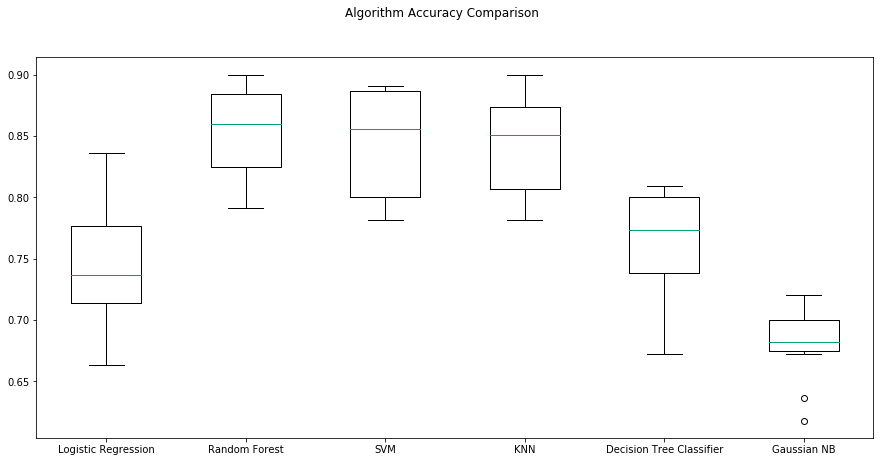

In [82]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm Accuracy Comparison')
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)
plt.show()

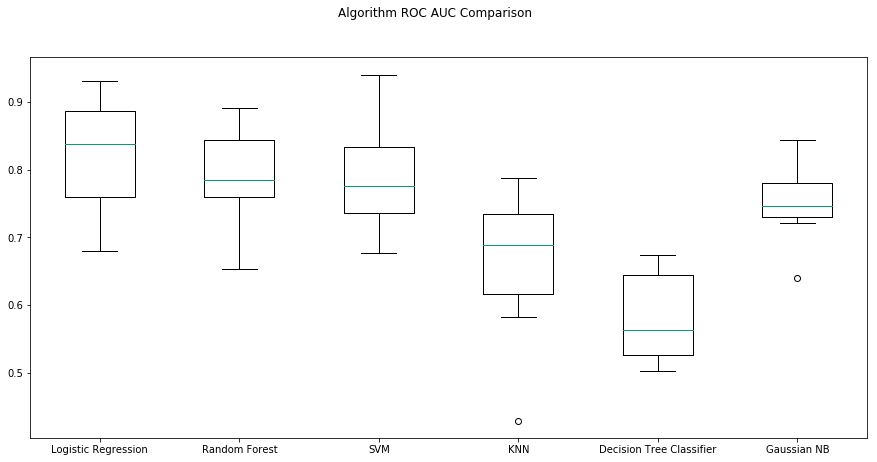

In [83]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm ROC AUC Comparison')
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)
plt.show()


Jak widać na powyższych wykresach regresja logistyczna której dokładność nie była największa okazuje się mieć najlepszy wynik ROC_AUC

Do dalszej analizy wybieram 2 pierwsze klasyfikatory z najwyższym ROC_AUC, tj.: LogisticRegression oraz RandomForest

W dalszej części postaram sie znaleźć najlepsze paramtery poniższych modeli wykorzystując kroswalidację oraz GridSearch

#### -Regresja logistyczna

In [84]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression(solver='liblinear',
                             class_weight="balanced", 
                             random_state=7)
scoring = 'roc_auc'
results = model_selection.cross_val_score(
    modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC score (STD): %.2f (%.2f)" % (results.mean(), results.std()))

AUC score (STD): 0.82 (0.08)


In [85]:
param_grid = {'C': np.arange(1e-03, 2, 0.01)} 
log_gs = GridSearchCV(LogisticRegression(solver='liblinear', 
                                         class_weight="balanced", 
                                         random_state=7),
                      iid=True,
                      return_train_score=True,
                      param_grid=param_grid,
                      scoring='roc_auc',
                      cv=10)

log_grid = log_gs.fit(X_train, y_train)
log_opt = log_grid.best_estimator_
results = log_gs.cv_results_

print('='*20)
print("best params: " + str(log_gs.best_estimator_))
print("best params: " + str(log_gs.best_params_))
print('best score:', log_gs.best_score_)
print('='*20)

best params: LogisticRegression(C=0.05099999999999999, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=7, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
best params: {'C': 0.05099999999999999}
best score: 0.8180815631000706


Jak zatem nasz model sprawdzi się danych testowyc?
Poniżej macierz pomyłek

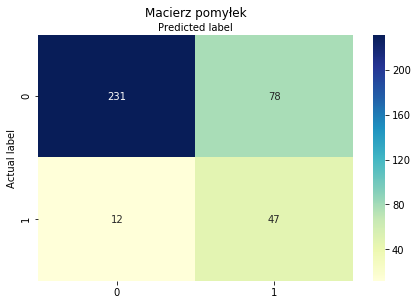

In [86]:
cnf_matrix = metrics.confusion_matrix(y_test, log_opt.predict(X_test))
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Macierz pomyłek', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

In [87]:
print('Dokładność modelu regresji liniowej na zbiorze testowym wynosi: {:.2f}'.format(log_opt.score(X_test, y_test)*100))

Dokładność modelu regresji liniowej na zbiorze testowym wynosi: 75.54


In [88]:
log_opt.fit(X_train, y_train)
print(classification_report(y_test, log_opt.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.95      0.75      0.84       309
         1.0       0.38      0.80      0.51        59

    accuracy                           0.76       368
   macro avg       0.66      0.77      0.67       368
weighted avg       0.86      0.76      0.78       368



In [89]:
log_opt.fit(X_train, y_train) 
probs = log_opt.predict_proba(X_test)
probs = probs[:, 1] 
logit_roc_auc = roc_auc_score(y_test, probs) 
print('AUC score: %.3f' % logit_roc_auc)

AUC score: 0.857


#### - Lasy losowe

In [90]:
rf_classifier = RandomForestClassifier(class_weight = "balanced",
                                       random_state=7)
param_grid = {'n_estimators': [50, 75, 100, 125, 150, 175],
              'min_samples_split':[2,4,6,8,10],
              'min_samples_leaf': [1, 2, 3, 4],
              'max_depth': [5, 10, 15, 20, 25]}

grid_obj = GridSearchCV(rf_classifier,
                        iid=True,
                        return_train_score=True,
                        param_grid=param_grid,
                        scoring='roc_auc',
                        cv=10)

grid_fit = grid_obj.fit(X_train, y_train)
rf_opt = grid_fit.best_estimator_

print('='*20)
print("best params: " + str(grid_obj.best_estimator_))
print("best params: " + str(grid_obj.best_params_))
print('best score:', grid_obj.best_score_)
print('='*20)

best params: RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=8, min_weight_fraction_leaf=0.0,
                       n_estimators=75, n_jobs=None, oob_score=False,
                       random_state=7, verbose=0, warm_start=False)
best params: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 75}
best score: 0.7956083711198764


Random Forest pozwala okreslić najwieksze czynniki wpływu. 

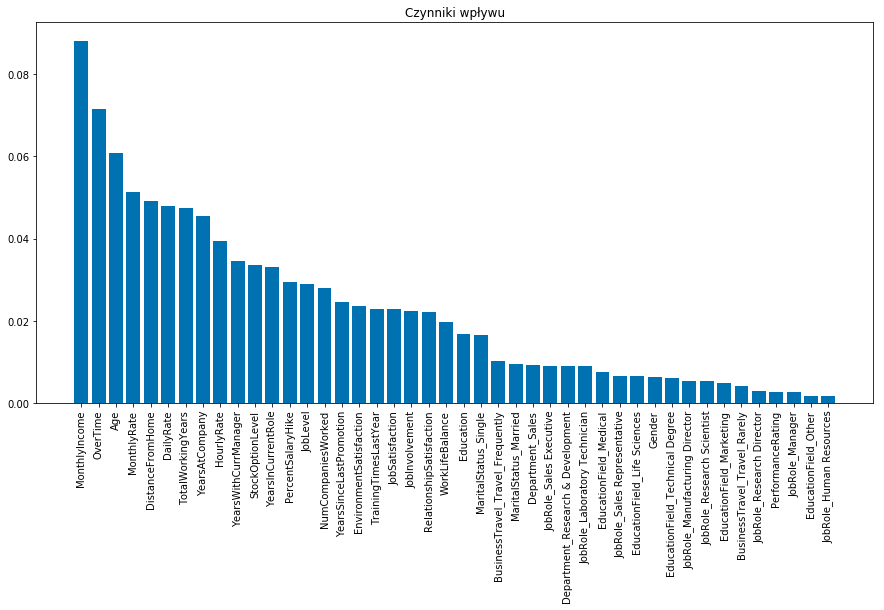

In [91]:
importances = rf_opt.feature_importances_
indices = np.argsort(importances)[::-1] 
names = [X_train.columns[i] for i in indices] 
plt.figure(figsize=(15, 7)) 
plt.title("Czynniki wpływu") 
plt.bar(range(X_train.shape[1]), importances[indices]) 
plt.xticks(range(X_train.shape[1]), names, rotation=90) 
plt.show() # Show plot

In [92]:
importances = rf_opt.feature_importances_
df_param_coeff = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(44):
    feat = X_train.columns[i]
    coeff = importances[i]
    df_param_coeff.loc[i] = (feat, coeff)
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff = df_param_coeff.reset_index(drop=True)
df_param_coeff.head(10)

,Feature,Coefficient
0,MonthlyIncome,0.088179
1,OverTime,0.071542
2,Age,0.060858
3,MonthlyRate,0.051225
4,DistanceFromHome,0.049128
5,DailyRate,0.047802
6,TotalWorkingYears,0.047392
7,YearsAtCompany,0.045513
8,HourlyRate,0.039374
9,YearsWithCurrManager,0.034526


Jak zatem nasz model sprawdzi się danych testowych?
Poniżej macierz pomyłek

Text(0.5, 257.44, 'Predicted label')

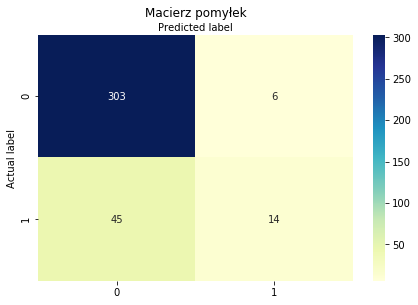

In [93]:
cnf_matrix = metrics.confusion_matrix(y_test, rf_opt.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Macierz pomyłek', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [94]:
print('Accuracy of RandomForest Regression Classifier on test set: {:.2f}'.format(rf_opt.score(X_test, y_test)*100))


Accuracy of RandomForest Regression Classifier on test set: 86.14


In [95]:
rf_opt.fit(X_train, y_train)
print(classification_report(y_test, rf_opt.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92       309
         1.0       0.70      0.24      0.35        59

    accuracy                           0.86       368
   macro avg       0.79      0.61      0.64       368
weighted avg       0.84      0.86      0.83       368



In [96]:
rf_opt.fit(X_train, y_train) 
probs = rf_opt.predict_proba(X_test) 
probs = probs[:, 1] 
rf_opt_roc_auc = roc_auc_score(y_test, probs) 
print('AUC score: %.3f' % rf_opt_roc_auc)

AUC score: 0.818


Podsumujmy graficznie oba modele w wykresie ROC

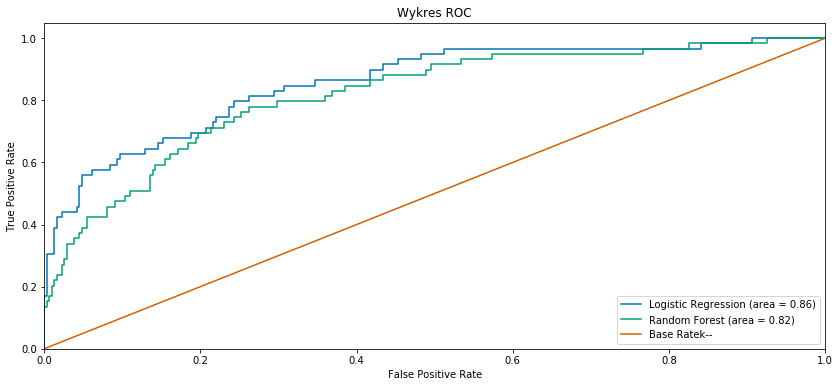

In [97]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, log_opt.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_opt.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))


plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_opt_roc_auc)

plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Wykres ROC')
plt.legend(loc="lower right")
plt.show()


Jak widać na powyższym wykresie regresja logistyczna daje lepszy wynik ROC AUC

Ponieważ firma generuje więcej danych o swoich pracownikach (na temat nowych członków i ostatnich osób opuszczających), algorytm może zostać ponownie przeszkolony przy użyciu dodatkowych danych i teoretycznie generować dokładniejsze prognozy w celu zidentyfikowania pracowników wysokiego ryzyka.

NA PODSTAWIE TAKIEJ ANALIZY MOŻNA WDROŻYĆ W FIRMIE NASTEPUJĄCE ROZWIĄZANIA:

Dochód miesięczny: osoby o wyższych zarobkach rzadziej opuszczają firmę. Dlatego należy zweryfikować proces bencharkingu płac, aby ustalić, czy firma zapewnia konkurencyjne wynagrodzenie.
Nadgodziny: osoby pracujące w godzinach nadliczbowych częściej opuszczają firmę. W związku z tym należy podjąć starania, aby odpowiednio ukierunkować projekty z odpowiednim wsparciem i siłą roboczą, aby ograniczyć wykorzystanie nadgodzin.Byc możne zatrudnienie nowych pracowników lub kupno usług zewnętrznych będzie dobrym rozwiązaniem.
Liczba lat z obecnym menedżerem: Duża liczba osób odchodzących rezygnuje z pracy w ciągu 6 miesięcy po swoich obecnych menedżerach. Ponadto można zweryfikować  od którego menedżeraodchodzi najwiuecej pracowników. Być może potrzebne będą dodatkowe szkolenia lub program naprawczy.
Wiek: pracownicy w stosunkowo młodym przedziale wiekowym 25-35 są bardziej skłonni do odejścia. Dlatego należy dołożyć starań, aby jasno przedstawić długoterminową wizję firmy i młodych pracowników, którzy pasują do tej wizji, a także zapewnić zachęty w postaci na przykład jasnych ścieżek do awansu. Jednoczesnie trzeba dbać o rożnorodność wiekową pracownikó podczas rekrutacji i zarządzania personelem.
DistanceFromHome: Pracownicy mieszkający daleko od pracy częściej opuszczają firmę. Dlatego można rozważyć zorganizowanie transportu firmowego.

Dzięki temu liczba pracowników odchodzących powinna spaść, wraz z kosztami z tym związanymi.